In [9]:
from lo_tools import Lfun, zrfun, zfun
from time import time
import xarray as xr
import sys
import dask

In [10]:
import matplotlib.pyplot as plt
from lo_tools import plotting_functions as pfun

In [11]:
Ldir = Lfun.Lstart(gridname='cas6', tag='v0', ex_name = 'live')
fn_list = Lfun.get_fn_list('hourly', Ldir, '2019.07.04', '2019.07.06') # length 73
gs = zfun.godin_shape() # length 71, sum = 1

In [12]:
if False:
    vn_list = ['salt']
else:
    vn_list = ['zeta','salt','temp','u','v','w',
    'NO3','phytoplankton','zooplankton',
    'detritus','Ldetritus','oxygen',
    'TIC','alkalinity',
    'Pair','Uwind','Vwind','shflux','ssflux','latent','sensible','lwrad','swrad',
    'sustr','svstr','bustr','bvstr']

In [13]:
vn_list

['zeta',
 'salt',
 'temp',
 'u',
 'v',
 'w',
 'NO3',
 'phytoplankton',
 'zooplankton',
 'detritus',
 'Ldetritus',
 'oxygen',
 'TIC',
 'alkalinity',
 'Pair',
 'Uwind',
 'Vwind',
 'shflux',
 'ssflux',
 'latent',
 'sensible',
 'lwrad',
 'swrad',
 'sustr',
 'svstr',
 'bustr',
 'bvstr']

In [15]:
%%time
for ii in range(1,72): # use (1,72) for full set
    ds = xr.open_dataset(fn_list[ii]), chunks={'s_rho':4})
    print(ii, end=',')
    sys.stdout.flush()
    if ii == 1:
        lp = (ds[vn_list] * gs[ii-1]).squeeze(dim='ocean_time', drop=True).compute()
    else:
        lp = (lp + (ds[vn_list] * gs[ii-1]).squeeze(dim='ocean_time', drop=True)).compute()

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,CPU times: user 5min 37s, sys: 1min 28s, total: 7min 6s
Wall time: 7min 19s


In [16]:
lp

<xarray.Dataset>
Dimensions:        (s_rho: 30, s_w: 31, eta_rho: 1302, xi_rho: 663,
                    eta_u: 1302, xi_u: 662, eta_v: 1301, xi_v: 663)
Coordinates:
  * s_rho          (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w            (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho        (eta_rho, xi_rho) float64 -130.0 -129.9 ... -122.0 -122.0
    lat_rho        (eta_rho, xi_rho) float64 42.01 42.01 42.01 ... 52.01 52.01
    lon_u          (eta_u, xi_u) float64 -130.0 -129.9 -129.9 ... -122.0 -122.0
    lat_u          (eta_u, xi_u) float64 42.01 42.01 42.01 ... 52.01 52.01 52.01
    lon_v          (eta_v, xi_v) float64 -130.0 -129.9 -129.9 ... -122.0 -122.0
    lat_v          (eta_v, xi_v) float64 42.01 42.01 42.01 ... 52.0 52.0 52.0
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables: (12/27)
    zeta           (eta_rho, xi_rho) float32 0.1911 0.1911 0.1904 ... nan nan
    salt           (s_rho, eta_rho, xi_rho) float32 34.68 34.68 ... nan nan
    temp           (s_rho, eta_rho, xi_rho) float32 1.274 1.276 ... nan nan
    u              (s_rho, eta_u, xi_u) float32 -0.009592 0.003782 ... nan nan
    v              (s_rho, eta_v, xi_v) float32 -0.004606 0.0006461 ... nan nan
    w              (s_w, eta_rho, xi_rho) float32 -0.0007031 -0.0007031 ... nan
    ...             ...
    lwrad          (eta_rho, xi_rho) float32 -17.8 -17.2 -16.9 ... nan nan nan
    swrad          (eta_rho, xi_rho) float32 135.4 136.3 136.3 ... nan nan nan
    sustr          (eta_u, xi_u) float32 0.02029 0.02047 0.02041 ... nan nan nan
    svstr          (eta_v, xi_v) float32 -0.03496 -0.03636 -0.03621 ... nan nan
    bustr          (eta_u, xi_u) float32 0.006925 0.006925 0.001476 ... nan nan
    bvstr          (eta_v, xi_v) float32 -0.001616 -0.001616 ... nan nan

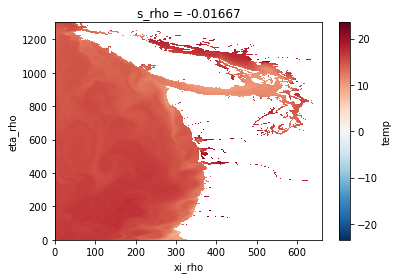

In [17]:
lp.temp[-1,:,:].plot()